In [23]:
from sklearn import metrics
import pandas as pd
import numpy as np
import json
import os

In [59]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [15]:
y = pd.read_csv('labels.csv')

In [157]:
def load_data():
    h_types = ['model_bounding_sphere_missed', 'model_bounding_sphere_concentric_sphere',
               'model_bounding_sphere_strict_outer', 'model_bounding_sphere_strict_outer_absolute']
    intervals = [8, 32, 64, 128]
    hists = {}
    for id in os.listdir('histograms/'):
        with open(os.path.join('histograms/', id), 'rb') as f:
            hists[id] = [np.array(h['data']) for h in json.loads(f.read())['histogram_data'] if
                         h['type'] in h_types and h['intervals'] in intervals]
            hists[id] = np.concatenate(hists[id])
    X = {'id': [x.split('.')[0] for x in list(hists.keys())], 'data': list(hists.values())}
    labels = pd.read_csv('labels.csv')
    labels.type = labels.type.apply(lambda x: x.split('.')[0])
    return pd.merge(labels, pd.DataFrame(X), left_on='model', right_on='id')

In [158]:
data = load_data()

In [159]:
labels = data.type.values
u_labels = np.unique(labels)
X = np.vstack(data['data'].values)

le = LabelEncoder().fit(labels)
y = le.transform(labels)

kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=8888).fit(X)
x_t = TSNE(n_components=2).fit_transform(X)
y_hat = kmeans.predict(X)

<AxesSubplot:>

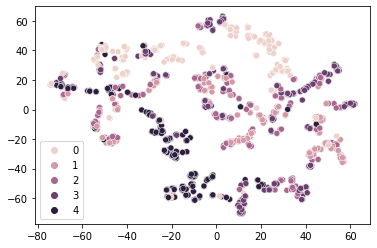

In [160]:
import seaborn as sns

sns.scatterplot(x=x_t[:, 0], y=x_t[:, 1], hue=y)

We will use v measure as we have ground-truth labels to compare from

In [162]:
metrics.v_measure_score(y, y_hat)

0.12908421936951223

We can see that the clustreing metrics are very low even on all possible features. It is likely due to complexity of representng 3d figures in feature vectors that can be used to separate different shapes.